In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 10,10
pd.set_option('display.max_columns',None)

#EDA

In [ ]:
# Import data

df = pd.read_csv('Clicked Ads Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
df.sample(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
744,744,67.35,29,332572940.0,118.69,Perempuan,4/28/2016 21:58,Yes,Palembang,Sumatra Selatan,Travel
186,186,46.31,57,309739640.0,153.98,Laki-Laki,3/24/2016 13:37,Yes,Batam,Kepulauan Riau,House
44,44,80.47,25,402637480.0,204.86,Perempuan,2/11/2016 13:26,No,Makassar,Sulawesi Selatan,Otomotif
222,222,49.95,39,481164250.0,136.59,Perempuan,3/24/2016 9:12,Yes,Bekasi,Jawa Barat,Food
17,17,82.03,41,500577560.0,187.53,Perempuan,5/2/2016 7:00,No,Depok,Jawa Barat,Health
954,954,51.65,31,412975920.0,249.99,Perempuan,5/25/2016 10:39,No,Palembang,Sumatra Selatan,Otomotif
377,377,69.20,42,182167930.0,123.80,Perempuan,6/17/2016 9:58,Yes,Batam,Kepulauan Riau,Travel
340,340,36.31,47,405883100.0,168.92,Perempuan,4/18/2016 0:49,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,House
138,138,71.89,23,431325860.0,172.81,Laki-Laki,2/3/2016 23:47,No,Semarang,Jawa Tengah,Furniture
683,683,76.83,28,475935880.0,192.81,Perempuan,3/4/2016 14:33,No,Bandung,Jawa Barat,Health


In [ ]:
df.rename(columns = {'Male':'Gender'}, inplace = True)
df['Gender'] = df['Gender'].fillna('Unknown')

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
df.duplicated().sum()

# No duplicate data

0

### Handle Null Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Gender                    1000 non-null   object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [ ]:
# Null data

df[['Daily Time Spent on Site','Area Income','Daily Internet Usage','Gender']].isna().sum()

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Gender                       0
dtype: int64

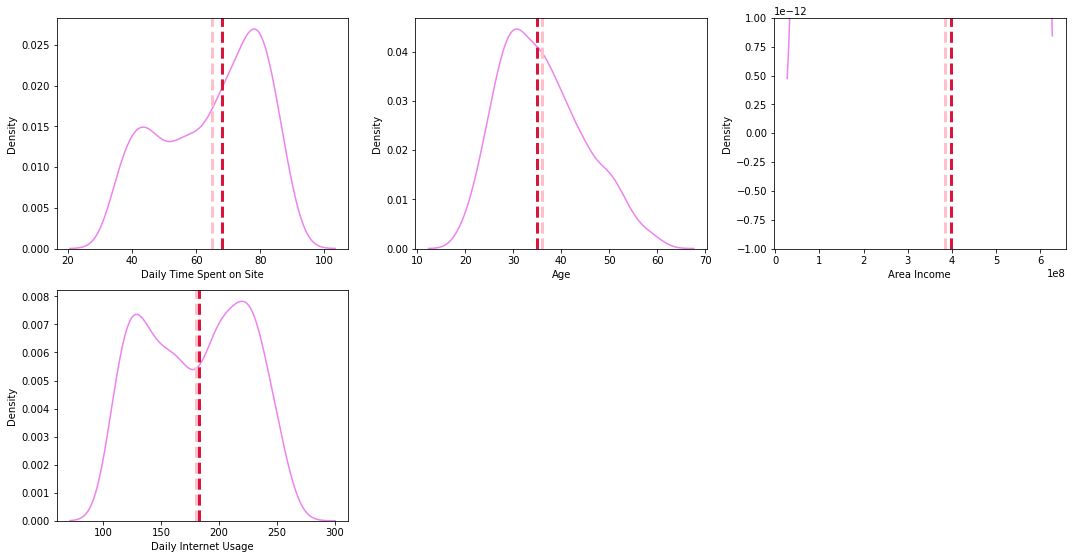

In [ ]:
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
plt.figure(figsize=(15, 15))
for i in range(0, len(num)):
    plt.subplot(4,3,  i+1)
    sns.kdeplot(x=df[num[i]], color='violet')
    plt.axvline(x=df[num[i]].median(), color='crimson', linestyle='--', linewidth=3)
    plt.axvline(x=df[num[i]].mean(), color='pink', linestyle='--', linewidth=3)
    plt.xlabel(num[i])
    plt.tight_layout()

In [ ]:
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].median())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Gender                    1000 non-null   object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


## Bivariate Analysis

In [ ]:
categoric = ['city','province','category','Gender','Clicked on Ad']
numeric = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']

In [ ]:
df[categoric].head()

,city,province,category,Gender,Clicked on Ad
0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,Perempuan,No
1,Denpasar,Bali,Food,Laki-Laki,No
2,Surabaya,Jawa Timur,Electronic,Perempuan,No
3,Batam,Kepulauan Riau,House,Laki-Laki,No
4,Medan,Sumatra Utara,Finance,Perempuan,No


In [ ]:
df[numeric].head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,432837300.0,256.09
1,80.23,31,479092950.0,193.77
2,69.47,26,418501580.0,236.50
3,74.15,29,383643260.0,245.89
4,68.37,35,517229930.0,225.58


### Categoric

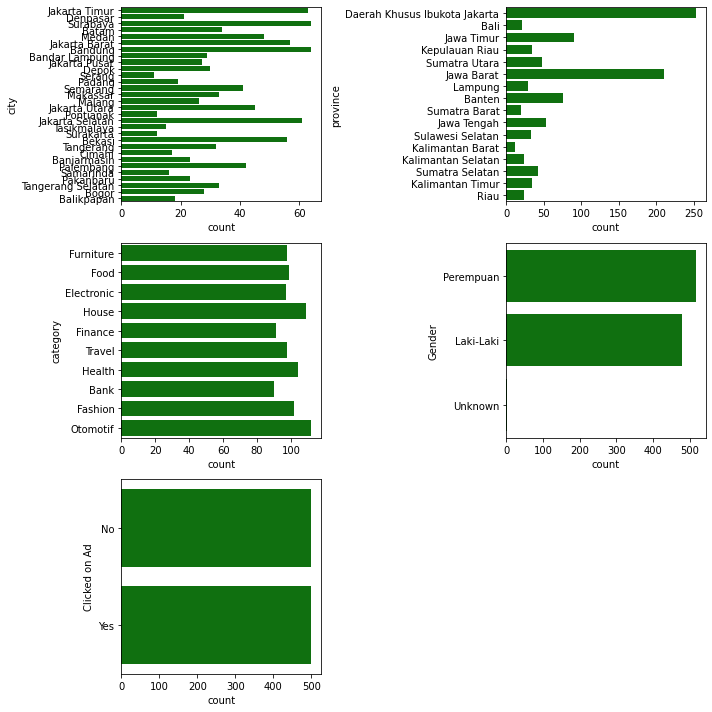

In [ ]:
plt.figure(figsize=(10,10))
for i in range (0, len(categoric)):
  plt.subplot(3,2,i+1)
  sns.countplot(y=df[categoric[i]], color='green', orient='h')
  plt.tight_layout()

Text(0.5, 1.0, 'Total Clicked on Ad')

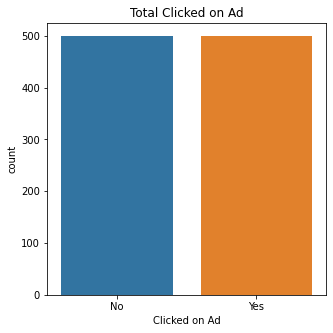

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Clicked on Ad', data=df)
plt.title('Total Clicked on Ad')

### Numeric

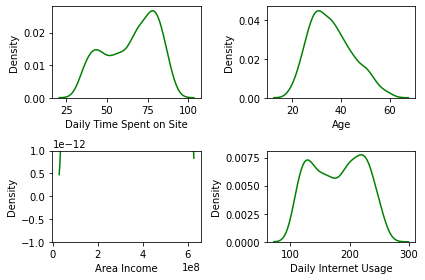

In [ ]:
for i in range(0, len(numeric)):
  plt.subplot(2,2,i+1)
  sns.kdeplot(x=df[numeric[i]], color='green')
  plt.tight_layout()

## Multivariate Analysis

In [ ]:
df['Clicked on Ad'] = np.where(df['Clicked on Ad'] == 'Yes',1,0)

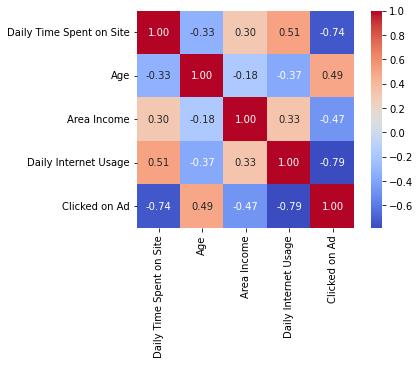

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, square=True, fmt='.2f')

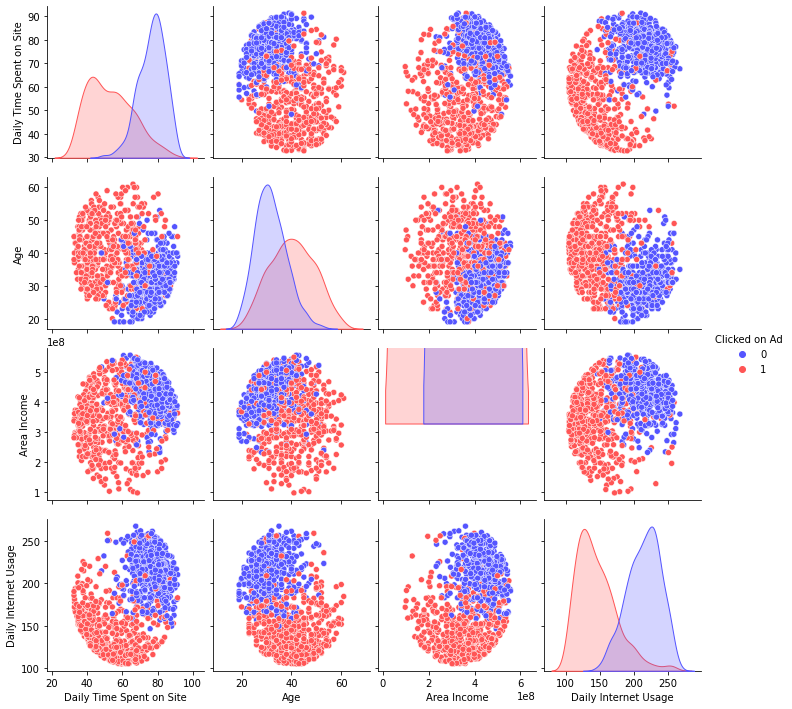

In [ ]:
sns.pairplot(df, hue='Clicked on Ad', palette='seismic')

# Data Preprocessing

## Feature Selection

In [ ]:
df.drop(columns = ['city'], inplace = True)

## Feature Engineering

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['month'] = df['Timestamp'].dt.month
df['week'] = df['Timestamp'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
df.drop(columns=['Timestamp'], inplace = True)

## Feature Encoding

In [ ]:
df_code = df.copy()

In [ ]:
label = ['Gender', 'Clicked on Ad']
ohe = ['province', 'category']

In [ ]:
# Label Encoding

Gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1,
    'Unknown' : 2
}

df_code['Gender'] = df_code['Gender'].map(Gender)

In [ ]:
# One Hot Encoding 
for categoric in ['province', 'category']:
    onehots = pd.get_dummies(df_code[categoric], prefix=categoric)
    df_code = df_code.join(onehots)
    df_code = df_code.drop(columns = [categoric])

In [ ]:
df_code.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,month,week,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
694,68.25,33,535361120.0,198.86,1,0,5,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
236,76.77,36,408438870.0,123.51,0,1,5,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
754,76.87,36,510641320.0,212.59,0,0,7,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
151,68.11,35,507674020.0,172.10,0,0,5,21,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
548,79.53,33,430271310.0,236.72,0,0,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
705,78.84,26,396156600.0,217.66,1,0,6,26,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
537,61.72,26,470953420.0,218.49,0,0,2,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
883,41.53,42,473025840.0,158.81,0,1,5,21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
980,67.26,57,179778550.0,168.41,1,1,5,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
318,80.72,31,480304860.0,186.37,0,0,4,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


# Machine Learning

In [ ]:
#Machine learning model library

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, average_precision_score
import matplotlib.pyplot as plt

def model_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    print('Accuracy : %.2f' % accuracy_score(ytest, pred))
    print('Precision : %.2f' % precision_score(ytest, pred))
    print('Recall : %.2f' % recall_score(ytest, pred))
    print('F-1Score : %.2f' % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print('ROC AUC : %.2f' % auc(fpr, tpr))
    
    # Average precision score
    average_precision = average_precision_score(ytest, pred)
    print('AP : %.2f'% average_precision)

### Splitting Train Test Dataset

In [ ]:
X = df_code.drop(columns=['Clicked on Ad'], axis=1)
y = df_code['Clicked on Ad']
print(X.shape)
print(y.shape)

(1000, 33)
(1000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

## Without Standardization

### Logistic Regression Without Standardization

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_evaluation(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy : 0.49
Precision : 0.00
Recall : 0.00
F-1Score : 0.00
ROC AUC : 0.50
AP : 0.51


### Logistic Regression With Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_std = LogisticRegression(random_state=42)
model_std.fit(X_train_standard, y_train)
y_pred = model_std.predict(X_test_standard)
model_evaluation(model_std, y_pred, X_train_standard, y_train, X_test_standard, y_test)

Accuracy : 0.95
Precision : 0.97
Recall : 0.94
F-1Score : 0.95
ROC AUC : 0.95
AP : 0.94


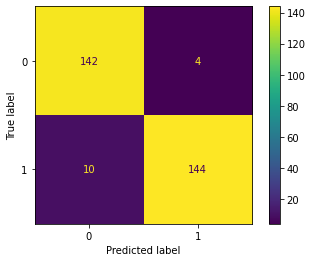

In [ ]:
cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_std.classes_)

disp.plot()
plt.show()

# Feature Importance

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
import shap
explainer = shap.LinearExplainer(model_std, X_train_standard, feature_dependence="independent")
shap_values = explainer.shap_values(X_test_standard)
X_test_array = np.asarray(X_test_standard)

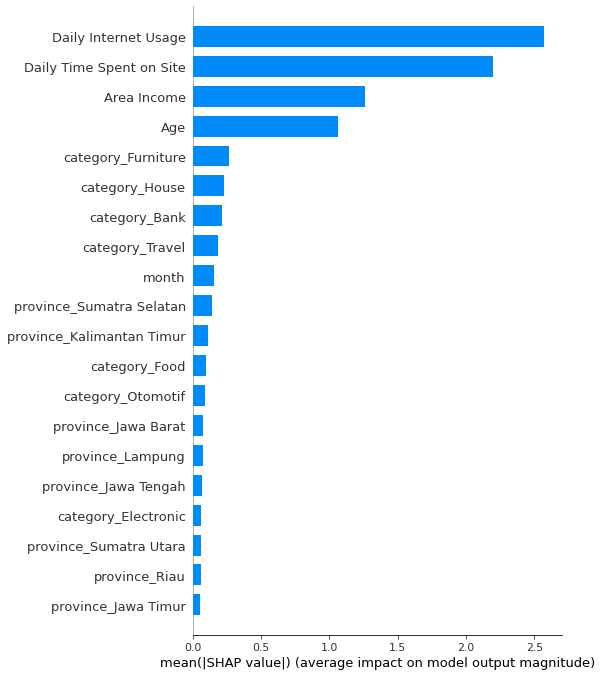

In [ ]:
#Feature Importance with SHAP Value
shap.summary_plot(shap_values, X_train.values, plot_type="bar", feature_names = X_train.columns)

- Berdasarkan 